In [20]:
import numpy as np
import matplotlib.pyplot as plt

* Chuẩn bị dữ liệu

In [21]:
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

y = np.array([
    [1],
    [1],
    [0],
    [0]
])

* Định nghĩa số lượng node trong từng layer

In [22]:
num_input = 2
num_hidden = 5
num_output = 1

* Khởi tạo `weights` và `bias`. Trước tiên, cần khởi tạo các `weight` giữa hai layer input và hidden.

In [23]:
Wxh = np.random.randn(num_input, num_hidden)
bh = np.zeros((1, num_hidden))

In [24]:
Wxh

array([[-0.06593343, -1.18038198, -0.81380933, -0.17351981,  0.17320614],
       [ 0.18427519, -2.40347959, -0.04784051, -1.19793602,  1.54485757]])

In [25]:
bh

array([[0., 0., 0., 0., 0.]])

* Khởi tạo `weights` và `bias` từ layer hidden đến output.

In [26]:
Why = np.random.randn(num_hidden, num_output)
by = np.zeros((1, num_output))

In [27]:
Why

array([[-0.659164  ],
       [-0.72001655],
       [-0.99787089],
       [ 1.22023096],
       [-0.78114786]])

In [28]:
by

array([[0.]])

* Định nghĩa hàm sigmoid

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

* Đạo hàm của hàm sigmoid

In [30]:
def sigmoid_derivative(z):
    return np.exp(-z) / ((1 + np.exp(-z))**2)

* Định nghĩa forward propagation

In [31]:
def forward_prop(X, Wxh, Why):
    z1 = np.dot(X, Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1, Why) + by
    y_hat = sigmoid(z2)
    
    return z1, a1, z2, y_hat

* Định nghĩa backward propagation

In [32]:
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y - y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, Why.T) * sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    
    return dJ_dWxh, dJ_dWhy

* Định nghĩa hàm chi phí

In [33]:
def cost_function(y, y_hat):
    J = 0.5 * sum((y - y_hat)**2)
    
    return J

* Định nghĩa learning rate và interations

In [34]:
alpha = 0.01
num_iterations = 5000

* Build network

In [35]:
cost = []

for i in range(num_iterations):
    z1, a1, z2, y_hat = forward_prop(X, Wxh, Why)
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
    
    # update weights
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy
    
    # compute cost
    c = cost_function(y, y_hat)
    
    cost.append(c)

* Trực quan hóa hàm `cost`

Text(0, 0.5, 'Cost')

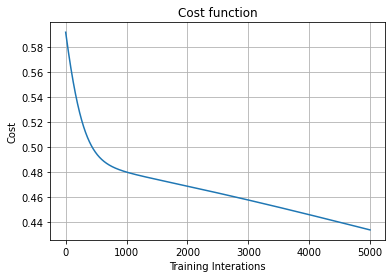

In [36]:
plt.grid()
plt.plot(range(num_iterations), cost)

plt.title('Cost function')
plt.xlabel('Training Interations')
plt.ylabel('Cost')